# Examen : Réseaux de Neurones Convolutifs (CNN)
## Objectif de l'examen
Dans cet examen, vous allez accomplir les tâches suivantes :

## Télécharger un dataset d'images :
* Importer un ensemble d'images de chiens directement depuis Internet.
* Prétraiter les images :
* Redimensionner les images,
* Normaliser les pixels,
* Organiser les données en lots prêts pour l'entraînement.

## Construire des modèles CNN :
* Implémenter des modèles de réseau de neurones convolutif en utilisant la bibliothèque Keras.

## Entraîner et évaluer le modèle :
* Entraîner les modèles sur les données d'entraînement,

## Évaluer ses performances sur l'ensemble de test.
## Analyser les résultats :
* Visualiser les performances des modèles en traçant les courbes d'apprentissage (exactitude et perte).

## Instructions
* Le code fourni contient des sections incomplètes identifiées par :

```
####### Écrire un code ici #######  

####### Fin du code ########
```

* Vous devez compléter ces parties manquantes en fonction des besoins de l'exercice.
* Assurez-vous que votre code est fonctionnel et bien organisé.

**Bonne chance !**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Charger le Dataset

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf

# Charger le dataset "Cats vs Dogs"
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:1120]', 'train[1120:1260]', 'train[1260:1400]'],  # 1000 pour entraînement, 200 pour validation et test
    as_supervised=True,  # Inclut les paires (image, label)
    with_info=True
)

# Fonction de prétraitement des images
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))  # Redimensionner à 224x224 pour VGG-16
    image = tf.cast(image, tf.float32) / 255.0  # Normaliser entre 0 et 1
    return image, label

# Appliquer le prétraitement
ds_train = ds_train.map(preprocess_image).batch(16).prefetch(buffer_size=tf.data.AUTOTUNE)
ds_val = ds_val.map(preprocess_image).batch(16).prefetch(buffer_size=tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess_image).batch(16).prefetch(buffer_size=tf.data.AUTOTUNE)  # Correction ici

# Afficher des informations sur les tailles des ensembles
print(f"Nombre d'exemples dans l'ensemble d'entraînement: {len(list(ds_train.unbatch()))}")
print(f"Nombre d'exemples dans l'ensemble de validation: {len(list(ds_val.unbatch()))}")
print(f"Nombre d'exemples dans l'ensemble de test: {len(list(ds_test.unbatch()))}")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.Z53ZPU_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Nombre d'exemples dans l'ensemble d'entraînement: 1120
Nombre d'exemples dans l'ensemble de validation: 140
Nombre d'exemples dans l'ensemble de test: 140


In [3]:
# Extraire une image du jeu d'entraînement
for im, lab in ds_train.take(1):  # Prendre un batch
    for image in im : # Sélectionner une image
        print("Dimensions de l'image :", image.shape)
        break;

Dimensions de l'image : (224, 224, 3)


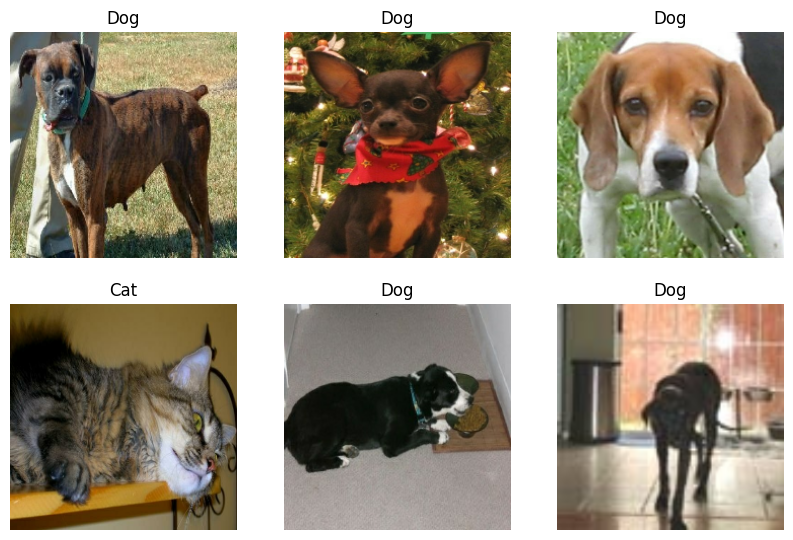

In [4]:
import matplotlib.pyplot as plt

# Fonction pour afficher quelques exemples avec leurs étiquettes
def display_samples(dataset, class_names, num_samples=6):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_samples)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image.numpy())
        plt.title(class_names[label.numpy()])
        plt.axis("off")

# Classes du dataset
class_names = ['Cat', 'Dog']

# Afficher 6 exemples aléatoires de l'ensemble d'entraînement
display_samples(ds_train.unbatch(), class_names)


# Exercice 1 :  Implémentez un modèle
## Architecture du modèle
Avant de vous lancer dans l'implémentation d'un réseau de neurones, vous devez impérativement comprendre son architecture dans les moindres détails ! Nous allons donc passer un peu de temps à étudier la configuration des différentes couche du modèle.
Le modèle est constitué de plusieurs couches, 2 couches de convolution et 2 fully-connected. Il doit donc apprendre les poids de 4 couches. Il prend en entrée une image en couleurs de taille 224  ×
 224 px et la classifie dans une de  2 classes.

L'architeu du modèle est illustrée par la fugure ci-dessous :

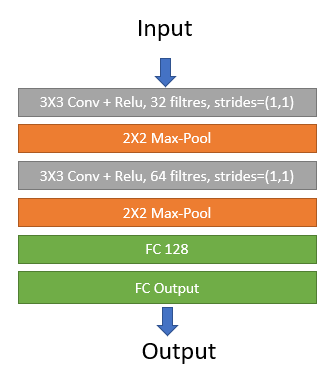

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Définir un modèle simple
def create_simple_model():
    model = Sequential([
        ####### Ecrire un code ici #######
        Conv2D(32, (3, 3), strides=(1,1), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3),strides=(1,1), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
        ####### Fin du code  ########
        ])

    return model

# Créer et compiler le modèle
model = create_simple_model()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Entraîner le modèle
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=50,
    verbose=1
)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.5108 - loss: 1.3693 - val_accuracy: 0.5500 - val_loss: 0.6920
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5598 - loss: 0.6903 - val_accuracy: 0.5071 - val_loss: 0.6756
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.6431 - loss: 0.6451 - val_accuracy: 0.5643 - val_loss: 0.6749
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7486 - loss: 0.5260 - val_accuracy: 0.5929 - val_loss: 0.7454
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8623 - loss: 0.3542 - val_accuracy: 0.6143 - val_loss: 0.7848
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9539 - loss: 0.1602 - val_accuracy: 0.6000 - val_loss: 1.1412
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9798 - loss: 0.0819 - val_accuracy: 0.6214 - val_loss: 1.1818
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9717 - loss: 0.0974 - val_accuracy: 0.6143 - 

In [21]:
# Évaluation du modèle
test_loss, test_accuracy = model.evaluate(ds_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7653 - loss: 1.6815
Test Loss: 2.5924
Test Accuracy: 69.29%


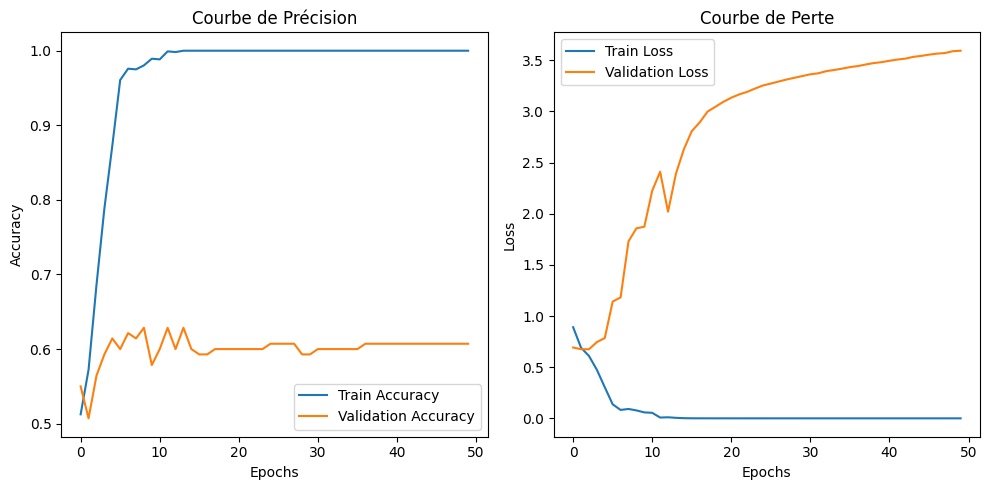

In [22]:
# --- Visualisation des performances --- #

# Fonction pour tracer les courbes d'apprentissage
def plot_history(history):
    plt.figure(figsize=(10, 5))

    # Précision
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Courbe de Précision')

    # Perte
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Courbe de Perte')

    plt.tight_layout()
    plt.show()

plot_history(history)

# Questionnaire sur le Modèle et les Résultats Obtenus
## * Répondez aux questions ci-dessous sur papier
### Question 1: Quelle est la limitation clé du modèle actuel ?

* a) Il est trop complexe pour le dataset utilisé.
* b) Il manque de régularisation pour éviter le surapprentissage.
* c) La taille des données est trop petite pour un modèle aussi grand.
* d) Toutes les réponses ci-dessus.

### Question 2: Quelle méthode pourrait améliorer les performances du modèle ?
* a) Augmentation des données (Data Augmentation)
* b) Utilisation du transfert d'apprentissag
* c) Utilisation d'un modèle plus simp
* d) Toutes les réponses ci-dessu

### Question 3: Que signifie un écart important entre la précision obtenue sur les données d'entraînement et celle obtenue sur les données de validation ?
* a) Le modèle sous-apprend.
* b) Le modèle sur-apprend.
* c) Le modèle généralise bien.
* d) Aucune des réponses ci-dessus.

### Question 4: Pourquoi l'exactitude d'entraînement augmente-t-elle continuellement tandis que celle de validation reste stable ?

* a) Le modèle commence à "mémoriser" les exemples d'entraînement plutôt que d'apprendre à généraliser.
* b) Le modèle n'a pas encore atteint sa capacité maximale d'apprentissage (sous-entraînement).
* c) L'optimisation du modèle est focalisée uniquement sur l'ensemble d'entraînement.

### Question 5: Que signifie une courbe de perte de validation qui augmente alors que la perte d'entraînement diminue ?

* a) Le modèle se spécialise sur les données d'entraînement, ce qui dégrade ses performances sur de nouvelles données.
* b) Le modèle nécessite davantage d'époques pour améliorer son apprentissage (sous-entraînement).
* c) Le modèle a une excellente capacité de généralisation sur les données de validation.

### Question 6: Quelle stratégie adopter si le surapprentissage persiste malgré plusieurs tentatives d'ajustement ?

* a) Augmenter la complexité du modèle pour capturer plus de détails dans les données.
* b) Collecter davantage de données pour renforcer l'entraînement du modèle.
* c) Utiliser une technique comme l'arrêt précoce (early stopping) pour limiter le surapprentissage.

# Exercice 2 : Implémentez VGG-16 en utilisant **la méthode fonctionnelle de Keras**
Proposer une implémentation complète de l'architecture VGG16 en utilisant **la méthode fonctionnelle de Keras**

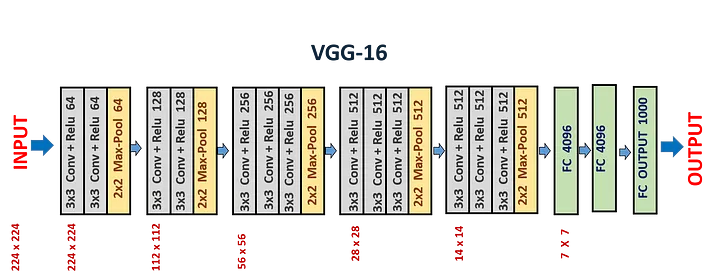

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def build_vgg16():

    ###### Ecrire un code ici ######
    # Input Layer
    inputs = Input(shape=(224, 224, 3))
    # Bloc 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    # Bloc 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    # Bloc 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    # Bloc 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Bloc 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Fully Connected Layers
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)

    # Output Layer
    outputs = Dense(1000, activation='softmax')(x)

    ###### Fin du code ######

    # Create Model
    model = Model(inputs, outputs, name='VGG16')

    return model

# Construire le modèle
vgg16_model = build_vgg16()

# Afficher le résumé du modèle
vgg16_model.summary()


Model: "VGG16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

# Exercice 3 : Utilisation du MobileNet pré-entraîné (fine-tuning)
Dans cette partie, vous allez classifier les images avec le modèle MobileNet fourni par Keras et pré-entraîné sur ImageNet.

La première étape consiste à charger ce modèle :

In [28]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Charger MobileNet préentraîné sur ImageNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Quelle stratégie d'utilisation de MobileNet préentraîné choisiriez-vous en fonction de la taille du dataset disponible et de la complexité du problème ? Fine-tuning total, Extraction de features ou Fine-tuning partiel.

#En fonction de la taille de l’ensemble de données disponibles et de la complexité du problème, proposez une stratégie de Fine-tuning.

In [31]:

# Ajouter des couches spécifiques au problème

###### Ecrire un code ici ######

# Ajouter une nouvelle tête de classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Remplace Flatten pour une meilleure généralisation
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # 1 sortie pour classification binaire (chat ou chien)

inputs=base_model.input

###### Fin du code ######

# Créer le modèle final
model = Model(inputs, x)

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
# proposez une stratégie de Fine-tuning. Fine-tuning total, Extraction de features ou Fine-tuning partiel.

###### Ecrire un code ici ######

for layer in model.layers:
   layer.trainable = True


###### Fin du code ######

# Compiler le modèle
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Perte binaire
    metrics=['accuracy']
)

# Entraîner le modèle
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=10,
    verbose=1
)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 36s 133ms/step - accuracy: 0.8702 - loss: 0.3803 - val_accuracy: 0.9500 - val_loss: 0.1414
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9615 - loss: 0.1432 - val_accuracy: 0.8714 - val_loss: 0.4547
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9867 - loss: 0.0472 - val_accuracy: 0.9429 - val_loss: 0.1702
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9794 - loss: 0.0686 - val_accuracy: 0.9571 - val_loss: 0.1805
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9899 - loss: 0.0312 - val_accuracy: 0.9214 - val_loss: 0.3243
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9846 - loss: 0.0370 - val_accuracy: 0.9357 - val_loss: 0.2142
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.9753 - loss: 0.0760 - val_accuracy: 0.9286 - val_loss: 0.2530
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9815 - loss: 0.0715 - val_accuracy: 0.9643 -

In [33]:
# Évaluation du modèle
test_loss, test_accuracy = model.evaluate(ds_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9233 - loss: 0.3421
Test Loss: 0.3505
Test Accuracy: 92.14%


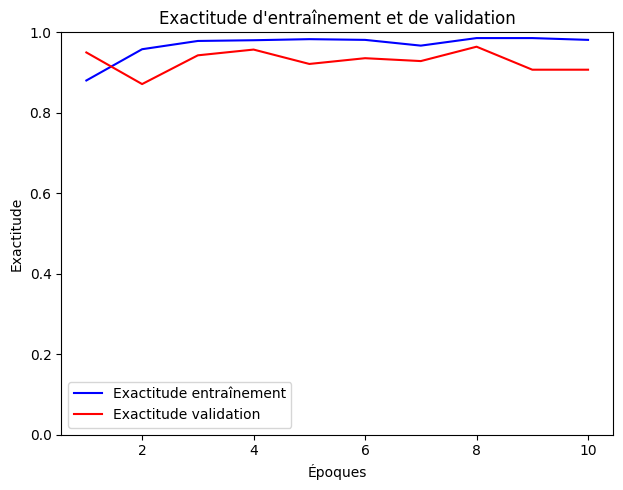

In [34]:
# --- Visualisation des performances --- #

# Fonction pour tracer les courbes d'apprentissage
def plot_history(history):
    # Récupérer les métriques depuis l'historique
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Tracer la précision
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Exactitude entraînement')
    plt.plot(epochs, val_acc, 'r', label='Exactitude validation')
    plt.title('Exactitude d\'entraînement et de validation')
    plt.xlabel('Époques')
    plt.ylabel('Exactitude')
    plt.ylim(0, 1)  # Ajuster l'échelle de précision entre 0 et 1
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(history)